In [2]:
#Inportando bibliotecas
import pandas as pd

#Biblioteca Grafica
import matplotlib.pyplot as plt
import numpy as np
#Biblioteca Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
# carregar csv
df = pd.read_csv('academia_redfit.csv')
df

,idade,sexo,frequencia_semanal_treino,tipo_atividade,tempo_medio_exercicio,minutos_totais_semana,preco_plano,possui_nutricionista,primeiro_PGC,ultimo_PGC,data_matricula,estado
0,48,Outro,7.0,Natação,45.3,317.1,188.47,Não,39.5,24.9,2021-07-28,Ativa
1,30,Outro,7.0,Yoga,98.1,686.7,198.07,Não,25.2,23.5,2020-12-28,Ativa
2,35,Masculino,5.0,Cardio,33.9,169.5,154.90,Não,27.2,11.4,2022-02-27,Ativa
3,43,Outro,3.0,Yoga,75.6,226.8,250.79,Sim,14.4,19.2,2022-12-01,Ativa
4,37,Masculino,0.0,CrossFit,114.0,0.0,168.02,Sim,21.5,18.1,2024-01-20,Sedentária
...,...,...,...,...,...,...,...,...,...,...,...,...
995,43,Feminino,0.0,Futebol,101.7,0.0,215.21,Não,31.1,32.4,2024-04-24,Sedentária
996,39,Outro,5.0,Futebol,78.0,390.0,269.34,Sim,38.8,31.8,2022-11-02,Ativa
997,25,Feminino,2.0,Natação,112.3,224.6,130.93,Não,23.8,28.4,2025-01-24,Ativa
998,24,Masculino,4.0,CrossFit,113.8,455.2,149.22,Sim,30.5,35.7,2020-12-03,Ativa


In [4]:
#padronizando
df["sexo"] = df["sexo"].str.strip().str.lower().map({
    "masculino":"M",
    "feminino":"F",
    "outro":"O"
})
df

,idade,sexo,frequencia_semanal_treino,tipo_atividade,tempo_medio_exercicio,minutos_totais_semana,preco_plano,possui_nutricionista,primeiro_PGC,ultimo_PGC,data_matricula,estado
0,48,O,7.0,Natação,45.3,317.1,188.47,Não,39.5,24.9,2021-07-28,Ativa
1,30,O,7.0,Yoga,98.1,686.7,198.07,Não,25.2,23.5,2020-12-28,Ativa
2,35,M,5.0,Cardio,33.9,169.5,154.90,Não,27.2,11.4,2022-02-27,Ativa
3,43,O,3.0,Yoga,75.6,226.8,250.79,Sim,14.4,19.2,2022-12-01,Ativa
4,37,M,0.0,CrossFit,114.0,0.0,168.02,Sim,21.5,18.1,2024-01-20,Sedentária
...,...,...,...,...,...,...,...,...,...,...,...,...
995,43,F,0.0,Futebol,101.7,0.0,215.21,Não,31.1,32.4,2024-04-24,Sedentária
996,39,O,5.0,Futebol,78.0,390.0,269.34,Sim,38.8,31.8,2022-11-02,Ativa
997,25,F,2.0,Natação,112.3,224.6,130.93,Não,23.8,28.4,2025-01-24,Ativa
998,24,M,4.0,CrossFit,113.8,455.2,149.22,Sim,30.5,35.7,2020-12-03,Ativa


In [5]:
#padronizando
df["tipo_atividade"] = df["tipo_atividade"].str.strip().str.lower()
df

,idade,sexo,frequencia_semanal_treino,tipo_atividade,tempo_medio_exercicio,minutos_totais_semana,preco_plano,possui_nutricionista,primeiro_PGC,ultimo_PGC,data_matricula,estado
0,48,O,7.0,natação,45.3,317.1,188.47,Não,39.5,24.9,2021-07-28,Ativa
1,30,O,7.0,yoga,98.1,686.7,198.07,Não,25.2,23.5,2020-12-28,Ativa
2,35,M,5.0,cardio,33.9,169.5,154.90,Não,27.2,11.4,2022-02-27,Ativa
3,43,O,3.0,yoga,75.6,226.8,250.79,Sim,14.4,19.2,2022-12-01,Ativa
4,37,M,0.0,crossfit,114.0,0.0,168.02,Sim,21.5,18.1,2024-01-20,Sedentária
...,...,...,...,...,...,...,...,...,...,...,...,...
995,43,F,0.0,futebol,101.7,0.0,215.21,Não,31.1,32.4,2024-04-24,Sedentária
996,39,O,5.0,futebol,78.0,390.0,269.34,Sim,38.8,31.8,2022-11-02,Ativa
997,25,F,2.0,natação,112.3,224.6,130.93,Não,23.8,28.4,2025-01-24,Ativa
998,24,M,4.0,crossfit,113.8,455.2,149.22,Sim,30.5,35.7,2020-12-03,Ativa


In [6]:
# padronizando
estado_norm = (
    df["estado"]
    .astype(str).str.strip()
    .replace({
        "ativa":"Ativa", "ativo":"Ativa",
        "sedentaria":"Sedentária", "sedentario":"Sedentária"
    })
)
df["estado_nome"] = estado_norm
df["estado_num"]  = df["estado_nome"].map({"Ativa": 1, "Sedentária": 0})
df

,idade,sexo,frequencia_semanal_treino,tipo_atividade,tempo_medio_exercicio,minutos_totais_semana,preco_plano,possui_nutricionista,primeiro_PGC,ultimo_PGC,data_matricula,estado,estado_nome,estado_num
0,48,O,7.0,natação,45.3,317.1,188.47,Não,39.5,24.9,2021-07-28,Ativa,Ativa,1
1,30,O,7.0,yoga,98.1,686.7,198.07,Não,25.2,23.5,2020-12-28,Ativa,Ativa,1
2,35,M,5.0,cardio,33.9,169.5,154.90,Não,27.2,11.4,2022-02-27,Ativa,Ativa,1
3,43,O,3.0,yoga,75.6,226.8,250.79,Sim,14.4,19.2,2022-12-01,Ativa,Ativa,1
4,37,M,0.0,crossfit,114.0,0.0,168.02,Sim,21.5,18.1,2024-01-20,Sedentária,Sedentária,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,43,F,0.0,futebol,101.7,0.0,215.21,Não,31.1,32.4,2024-04-24,Sedentária,Sedentária,0
996,39,O,5.0,futebol,78.0,390.0,269.34,Sim,38.8,31.8,2022-11-02,Ativa,Ativa,1
997,25,F,2.0,natação,112.3,224.6,130.93,Não,23.8,28.4,2025-01-24,Ativa,Ativa,1
998,24,M,4.0,crossfit,113.8,455.2,149.22,Sim,30.5,35.7,2020-12-03,Ativa,Ativa,1


In [7]:
#converter data matricula
df["data_matricula"] = pd.to_datetime(df["data_matricula"], errors="coerce")
hoje = pd.Timestamp.today().normalize()
df["dias_desde_matricula"] = (hoje - df["data_matricula"]).dt.days
df

,idade,sexo,frequencia_semanal_treino,tipo_atividade,tempo_medio_exercicio,minutos_totais_semana,preco_plano,possui_nutricionista,primeiro_PGC,ultimo_PGC,data_matricula,estado,estado_nome,estado_num,dias_desde_matricula
0,48,O,7.0,natação,45.3,317.1,188.47,Não,39.5,24.9,2021-07-28,Ativa,Ativa,1,1508
1,30,O,7.0,yoga,98.1,686.7,198.07,Não,25.2,23.5,2020-12-28,Ativa,Ativa,1,1720
2,35,M,5.0,cardio,33.9,169.5,154.90,Não,27.2,11.4,2022-02-27,Ativa,Ativa,1,1294
3,43,O,3.0,yoga,75.6,226.8,250.79,Sim,14.4,19.2,2022-12-01,Ativa,Ativa,1,1017
4,37,M,0.0,crossfit,114.0,0.0,168.02,Sim,21.5,18.1,2024-01-20,Sedentária,Sedentária,0,602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,43,F,0.0,futebol,101.7,0.0,215.21,Não,31.1,32.4,2024-04-24,Sedentária,Sedentária,0,507
996,39,O,5.0,futebol,78.0,390.0,269.34,Sim,38.8,31.8,2022-11-02,Ativa,Ativa,1,1046
997,25,F,2.0,natação,112.3,224.6,130.93,Não,23.8,28.4,2025-01-24,Ativa,Ativa,1,232
998,24,M,4.0,crossfit,113.8,455.2,149.22,Sim,30.5,35.7,2020-12-03,Ativa,Ativa,1,1745


In [8]:
#calcular novas metricas
df["imc_estimado"] = df["idade"]*0.3 + df["tempo_medio_exercicio"].fillna(0)*0.1
df["evolucao_pgc"] = df["primeiro_PGC"] - df["ultimo_PGC"]

In [9]:
#Separando X, y e ativa, sendentária
X = df.drop("estado", axis=1)
y = df["estado"]

In [10]:
# separa colunas
numeric_cols = df.select_dtypes(include=["number", "float64", "int64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

In [11]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median(numeric_only=True))
df[categorical_cols] = df[categorical_cols].fillna("desconhecido")

In [12]:
df.to_csv("academia_redfit_limpo.csv", index=False)
print("Versão limpa salva com sucesso!")

Versão limpa salva com sucesso!


In [13]:
#Análise grafica

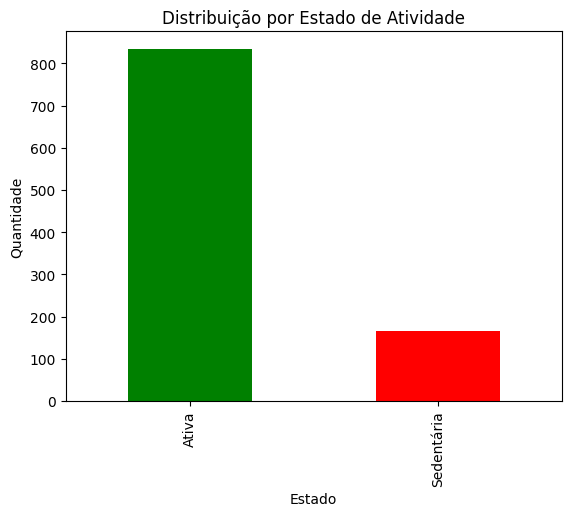

In [14]:
counts = df["estado"].value_counts()
ax = counts.plot(kind="bar", color=["green", "red"])
plt.title("Distribuição por Estado de Atividade")
plt.xlabel("Estado")
plt.ylabel("Quantidade")
plt.show()

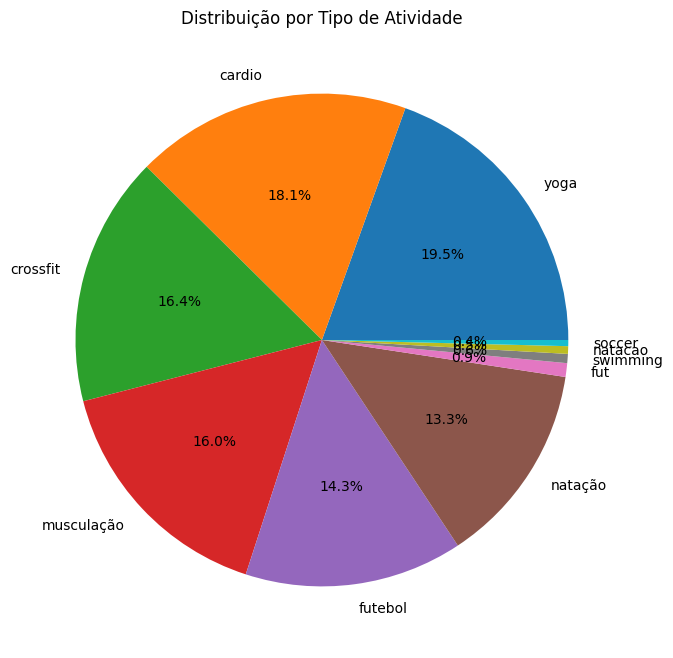

In [15]:
df["tipo_atividade"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8))
plt.title("Distribuição por Tipo de Atividade")
plt.ylabel("")
plt.show()


In [16]:
#medias
print("Média de idade:", df["idade"].mean())
print("Média de minutos semanais:", df["minutos_totais_semana"].mean())
print("Média da evolução de PGC:", df["evolucao_pgc"].mean())

Média de idade: 40.811
Média de minutos semanais: 243.3337
Média da evolução de PGC: 0.19430000000000008


In [17]:
y = df["estado_num"]
X = df.drop(columns=[
    "estado",
    "estado_nome",
    "estado_num",
    "data_matricula"
])

In [18]:
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = [c for c in X.columns if c not in categorical_features]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numerical_features),
    ]
)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

pipeline = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestClassifier(n_estimators=200, random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        33
           1       0.95      1.00      0.98       167

    accuracy                           0.96       200
   macro avg       0.98      0.88      0.92       200
weighted avg       0.96      0.96      0.96       200

